## DSA Assignment 5


💡 **Question 1**

Convert 1D Array Into 2D Array

You are given a **0-indexed** 1-dimensional (1D) integer array original, and two integers, m and n. You are tasked with creating a 2-dimensional (2D) array with  m rows and n columns using **all** the elements from original.

The elements from indices 0 to n - 1 (**inclusive**) of original should form the first row of the constructed 2D array, the elements from indices n to 2 * n - 1 (**inclusive**) should form the second row of the constructed 2D array, and so on.

Return *an* m x n *2D array constructed according to the above procedure, or an empty 2D array if it is impossible*.

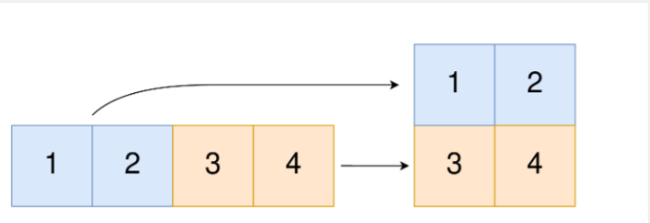

**Input:** original = [1,2,3,4], m = 2, n = 2

**Output:** [[1,2],[3,4]]

**Explanation:** The constructed 2D array should contain 2 rows and 2 columns.

The first group of n=2 elements in original, [1,2], becomes the first row in the constructed 2D array.

The second group of n=2 elements in original, [3,4], becomes the second row in the constructed 2D array.

In [1]:
import numpy as np

class Solution:
    def newArray(self, m, n, array):
        if len(array) != m * n:
            return np.empty((0, 0))
        
        arr = np.empty((m, n))

        for i in range(len(array)):
            row_index = i // n
            col_index = i % n

            arr[row_index][col_index] = array[i]

        return arr


In [2]:
array=[1,2,3,4]
m=2
n=2
Solution().newArray(m,n,array)

array([[1., 2.],
       [3., 4.]])


💡 **Question 2**
You have n coins and you want to build a staircase with these coins. The staircase consists of k rows where the ith row has exactly i coins. The last row of the staircase **may be** incomplete.

Given the integer n, return *the number of **complete rows** of the staircase you will build*.

**Example 1:**

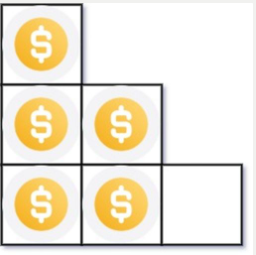

**Input:** n = 5

**Output:** 2

**Explanation:** Because the 3rd row is incomplete, we return 2.


In [3]:
class Solution():
    def staircase(self,n):
        left,right=0,n+1
        while left <= right :
            middle = (left + right)//2
            if (middle*(middle+1))//2 > n:
                right = middle -1
            elif (middle*(middle+1))//2 < n:
                left = middle +1
            else:
                return middle
        return left-1
            

In [4]:
n=12
Solution().staircase(n)

4


💡 **Question 3**

Given an integer array nums sorted in **non-decreasing** order, return *an array of **the squares of each number** sorted in non-decreasing order*.

**Example 1:**

**Input:** nums = [-4,-1,0,3,10]

**Output:** [0,1,9,16,100]

**Explanation:** After squaring, the array becomes [16,1,0,9,100].

After sorting, it becomes [0,1,9,16,100].



In [5]:
class Solution:
    def squared(self, nums):
        squared = []
        for i in nums:
            squared.append(i ** 2)
            squared=self.merge_sort(squared)
        return squared
    

    def merge_sort(self, squared):
        # Base case: If the list has only one element, it is already sorted
        if len(squared) <= 1:
            return squared

        # Divide the list into two halves
        mid = len(squared) // 2
        left_half = squared[:mid]
        right_half = squared[mid:]

        # Recursively sort each half
        left_sorted = self.merge_sort(left_half)
        right_sorted = self.merge_sort(right_half)

        # Merge the sorted halves
        merged = self.merge(left_sorted, right_sorted)
        return merged

    def merge(self, left, right):
        merged = []
        left_index = 0
        right_index = 0

        # Merge the two halves by comparing elements
        while left_index < len(left) and right_index < len(right):
            if left[left_index] <= right[right_index]:
                merged.append(left[left_index])
                left_index += 1
            else:
                merged.append(right[right_index])
                right_index += 1

        # Append any remaining elements from the left or right halves
        merged.extend(left[left_index:])
        merged.extend(right[right_index:])

        return merged


In [6]:
nums = [-4,-1,0,3,10]
Solution().squared(nums)

[0, 1, 9, 16, 100]

💡 **Question 4**

Given two **0-indexed** integer arrays nums1 and nums2, return *a list* answer *of size* 2 *where:*

- answer[0] *is a list of all **distinct** integers in* nums1 *which are **not** present in* nums2*.*
- answer[1] *is a list of all **distinct** integers in* nums2 *which are **not** present in* nums1.

**Note** that the integers in the lists may be returned in **any** order.

**Example 1:**

**Input:** nums1 = [1,2,3], nums2 = [2,4,6]

**Output:** [[1,3],[4,6]]

**Explanation:**

For nums1, nums1[1] = 2 is present at index 0 of nums2, whereas nums1[0] = 1 and nums1[2] = 3 are not present in nums2. Therefore, answer[0] = [1,3].

For nums2, nums2[0] = 2 is present at index 1 of nums1, whereas nums2[1] = 4 and nums2[2] = 6 are not present in nums2. Therefore, answer[1] = [4,6].

In [7]:
class Solution():
    def notPresent(self,nums1,nums2):
        arr=[[],[]]
        for i in nums1:
            if not i in nums2:
                arr[0].append(i)
        for i in nums2:
            if not i in nums1:
                arr[1].append(i)
        return arr

In [8]:
nums1=[1,2,3]
nums2=[2,4,6]
Solution().notPresent(nums1,nums2)

[[1, 3], [4, 6]]


💡 **Question 5**

Given two integer arrays arr1 and arr2, and the integer d, *return the distance value between the two arrays*.

The distance value is defined as the number of elements arr1[i] such that there is not any element arr2[j] where |arr1[i]-arr2[j]| <= d.

**Example 1:**

**Input:** arr1 = [4,5,8], arr2 = [10,9,1,8], d = 2

**Output:** 2

**Explanation:**

For arr1[0]=4 we have:

|4-10|=6 > d=2

|4-9|=5 > d=2

|4-1|=3 > d=2

|4-8|=4 > d=2

For arr1[1]=5 we have:

|5-10|=5 > d=2

|5-9|=4 > d=2

|5-1|=4 > d=2

|5-8|=3 > d=2

For arr1[2]=8 we have:

**|8-10|=2 <= d=2**

**|8-9|=1 <= d=2**

|8-1|=7 > d=2

**|8-8|=0 <= d=2**



In [9]:
class Solution():
    def arrayDist(self,arr1,arr2,d):
        output=0
        for i in arr1:
            for j in arr2:
                if abs(i-j) <=d:
                    break
            else:
                output+=1
        return output

In [10]:
arr1 = [4,5,8]
arr2 = [10,9,1,8]
d = 2
Solution().arrayDist(arr1,arr2,d)

2


💡 **Question 6**

Given an integer array nums of length n where all the integers of nums are in the range [1, n] and each integer appears **once** or **twice**, return *an array of all the integers that appears **twice***.

You must write an algorithm that runs in O(n) time and uses only constant extra space.

**Example 1:**

**Input:** nums = [4,3,2,7,8,2,3,1]

**Output:**

[2,3]


In [11]:
class Solution:
    def findDuplicates(self, nums):
        n = len(nums)
        result = []
        
        for i in range(n):
            index = abs(nums[i]) - 1
            if nums[index] > 0:
                nums[index] *= -1
            else:
                result.append(index + 1)
        
        return result


In [12]:
nums=[7,3,4,2,8,2,3,1]
Solution().findDuplicates(nums)

[2, 3]

💡 **Question 7**

Suppose an array of length n sorted in ascending order is **rotated** between 1 and n times. For example, the array nums = [0,1,2,4,5,6,7] might become:

- [4,5,6,7,0,1,2] if it was rotated 4 times.
- [0,1,2,4,5,6,7] if it was rotated 7 times.

Notice that **rotating** an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of **unique** elements, return *the minimum element of this array*.

You must write an algorithm that runs in O(log n) time.

**Example 1:**

**Input:** nums = [3,4,5,1,2]

**Output:** 1

**Explanation:**

The original array was [1,2,3,4,5] rotated 3 times.

In [11]:
class Solution:
    def findMin(self, nums):
        left = 0
        right = len(nums) - 1

        while left < right:
            mid = left + (right - left) // 2

            if nums[mid] > nums[right]:
                left = mid + 1
            elif nums[mid] < nums[left]:
                right = mid
            else:
                right -= 1

        return nums[left]


In [12]:
nums=[5,1,2,3,4,5]
Solution().findMin(nums)

1


💡 **Question 8**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].


In [30]:
class Solution:
    def doubled(self, changed):
        original = []
        seen = set()

        for num in changed:
            if num / 2 in seen:
                original.append(num // 2)
                seen.remove(num / 2)
            else:
                seen.add(num)

        return original if len(original) == len(changed) / 2 else []


In [32]:
changed = [1,3,4,2,6,8]
Solution().doubled(changed)

[1, 3, 4]

## The End